In [1]:
#from redditscore.tokenizer import CrazyTokenizer

import pandas as pd
import string
import re
import time

import gensim
from gensim.test.utils import common_corpus, common_dictionary, get_tmpfile
from gensim import corpora
from gensim.test.utils import datapath
import pyLDAvis

import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud

import matplotlib.pyplot as plt



C:\Users\Emilie\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
C:\Users\Emilie\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:34: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\Emilie\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:164: DeprecationWarning: `np.float` is a

In [2]:
data = pd.read_csv("data_clean_with_POS.csv")

C:\Users\Emilie\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
data = data.drop(["Unnamed: 0"], axis = 1)
data.head()

C:\Users\Emilie\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0.1,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,body,sentiment,score,Biden,Trump,politicians,body_clean,nouns_and_verbs
0,17897,comment,hhz51el,2x4yx,coronavirus,False,1635163268,https://old.reddit.com/r/Coronavirus/comments/...,&gt; At a White House briefing at the end of A...,0.8310,14,1,0,Biden,"['white', 'house', 'briefing', 'end', 'august'...","[house, briefing, end, august, 'fauci', presid..."
1,74176,comment,hhpd5hi,2x4yx,coronavirus,False,1634960088,https://old.reddit.com/r/Coronavirus/comments/...,It was Trump’s fault by politicizing the pande...,-0.9744,3,0,1,Trump,"['trump', 'fault', 'politicizing', 'pandemic',...","[trump, fault, 'politicize', fuck, divide, peo..."
2,74631,comment,hhpab6g,2x4yx,coronavirus,False,1634958446,https://old.reddit.com/r/Coronavirus/comments/...,Don't forget about the government forcefully s...,-0.5321,3,0,1,Trump,"['forget', 'government', 'forcefully', 'seizin...","['forget', government, 'seize', supply, hospit..."
3,78721,comment,hholqh5,2x4yx,coronavirus,False,1634945622,https://old.reddit.com/r/Coronavirus/comments/...,I agree with the sentiment that you and /u/Fig...,-0.9349,1,0,1,Trump,"['agree', 'sentiment', 'remember', 'bush', 'er...","['agree', sentiment, 'remember', bush, era, ta..."
4,86333,comment,hhnfhsj,2x4yx,coronavirus,False,1634926799,https://old.reddit.com/r/Coronavirus/comments/...,I don't think that the CDC was able to provide...,0.6801,7,0,1,Trump,"['think', 'cdc', 'able', 'provide', 'consisten...","['think', cdc, 'provide', messaging, 'start', ..."


In [4]:
stop_en = nltk.corpus.stopwords.words('english')

C:\Users\Emilie\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
stop_en.extend([
    "http"
               ]) 

C:\Users\Emilie\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
stop_en.extend([
    "s","it", "us", "m","he,", "she", "gt","d", "i", '’', '‘', '',  '—', '–', '…', '“', '”', "f", 'v', '', "u", 
    "amp", "get", "would", "year", "even", "new", "say", "said", "got", "one", "also", "like", "thing", "think",
    "go", "need", "could", "may", "going", "know", "many", "make", "really", "well", "see", "back", "lot", "much",
    "want", "look", "back", "every", "each", "something", "keep", "two", "still", "anything", "better"
               ]) 

### getting the LDA model

In [5]:
lemma = WordNetLemmatizer()
Lda = gensim.models.ldamodel.LdaModel

C:\Users\Emilie\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
def get_ldamodel(df):
    
    df = df.dropna()
    texts = df["nouns_and_verbs"].to_list()
    gen_docs = [[w for w in word_tokenize(text)] for text in texts]    
    gen_docs = [[lemma.lemmatize(word) for word in doc] for doc in gen_docs]
    gen_docs = [[word for word in doc if word not in stop_en] for doc in gen_docs]
    gen_docs = [[word.strip(string.punctuation) for word in doc] for doc in gen_docs]
    gen_docs = [[word for word in doc if word not in stop_en] for doc in gen_docs]
    dictionary = corpora.Dictionary(gen_docs)
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in gen_docs]    
    ldamodel = Lda(doc_term_matrix, num_topics=3, id2word = dictionary, passes=1)
    
    return ldamodel

C:\Users\Emilie\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### topics by person (Trump or Biden)

In [17]:
data_trump = data[data['politicians'] == "Trump"]
data_biden = data[data['politicians'] == "Biden"]

C:\Users\Emilie\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
pyLDAvis.enable_notebook()

C:\Users\Emilie\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\Emilie\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


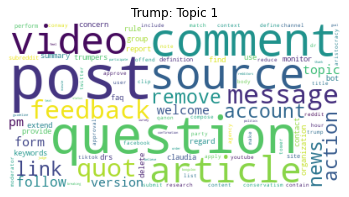

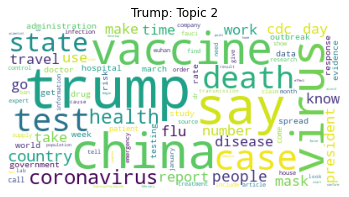

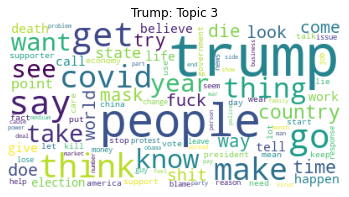

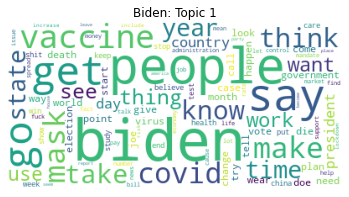

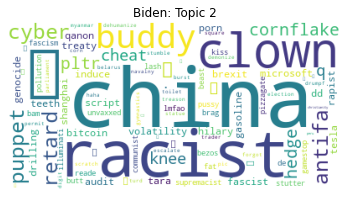

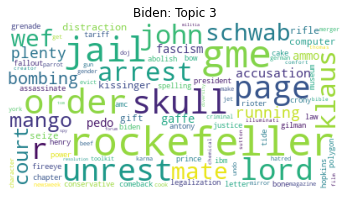

In [23]:
topics_by_person = {}

ldamodel_trump = get_ldamodel(data_trump)
topics_by_person["Trump"] = ldamodel_trump.print_topics(num_topics=3, num_words=10)
for t in range(ldamodel_trump.num_topics):
    plt.figure()
    plt.imshow(WordCloud(background_color="white", max_words = 100).fit_words(dict(ldamodel_trump.show_topic(t, 200))))
    plt.axis("off")
    plt.title(f"Trump: Topic {t+1}")
    plt.show()

ldamodel_biden = get_ldamodel(data_biden)
topics_by_person["Biden"] = ldamodel_biden.print_topics(num_topics=3, num_words=10)
for t in range(ldamodel_biden.num_topics):
    plt.figure()
    plt.imshow(WordCloud(
        background_color="white", max_words = 100
    ).fit_words(dict(ldamodel_biden.show_topic(t, 200))))
    plt.axis("off")
    plt.title(f"Biden: Topic {t+1}")
    plt.show()       

In [24]:
for subreddit in topics_by_person.items():
    sr_name = subreddit[0]
    topic1 = subreddit[1][0]
    topic1_str = str(topic1[1])
    topics1 = re.findall('"\w+"', topic1_str)
    topic2 = subreddit[1][1]
    topic2_str = str(topic2[1])
    topics2 = re.findall('"\w+"', topic2_str)
    topic3 = subreddit[1][2]
    topic3_str = str(topic3[1])
    topics3 = re.findall('"\w+"', topic3_str)
      
    print(f"{sr_name}:\n1: {topics1}\n2: {topics2}\n3: {topics3}\n")
    
end = time.time()

Trump:
1: ['"post"', '"question"', '"comment"', '"source"', '"video"', '"article"', '"message"', '"feedback"', '"quot"']
2: ['"trump"', '"say"', '"china"', '"virus"', '"vaccine"', '"case"', '"test"', '"death"', '"state"']
3: ['"trump"', '"people"', '"get"', '"go"', '"say"', '"think"', '"covid"', '"make"', '"thing"']

Biden:
1: ['"biden"', '"people"', '"say"', '"get"', '"go"', '"vaccine"', '"mask"', '"make"', '"covid"']
2: ['"china"', '"racist"', '"clown"', '"buddy"', '"cyber"', '"puppet"', '"antifa"']
3: ['"rockefeller"', '"gme"', '"order"', '"jail"', '"skull"', '"page"', '"unrest"', '"lord"', '"r"']



C:\Users\Emilie\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:5: DeprecationWarning: invalid escape sequence \w
<>:8: DeprecationWarning: invalid escape sequence \w
<>:11: DeprecationWarning: invalid escape sequence \w
<>:5: DeprecationWarning: invalid escape sequence \w
<>:8: DeprecationWarning: invalid escape sequence \w
<>:11: DeprecationWarning: invalid escape sequence \w
<ipython-input-24-d942018400e7>:5: DeprecationWarning: invalid escape sequence \w
  topics1 = re.findall('"\w+"', topic1_str)
<ipython-input-24-d942018400e7>:8: DeprecationWarning: invalid escape sequence \w
  topics2 = re.findall('"\w+"', topic2_str)
<ipython-input-24-d942018400e7>:11: DeprecationWarning: invalid escap

In [25]:
print(((end-start)/60)/60)

3.7308454581764012


C:\Users\Emilie\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
